In [269]:
import pandas as pd
import numpy as np
import nltk
import re

In [389]:
df = pd.read_csv("stocks.csv", encoding = "ISO-8859-1").dropna()
df = df.reset_index()
df = df.drop(columns="index")
df["All"] = ""
for i in range(df.shape[0]):
    sentances = ""
    for j in range(2,df.shape[1]):
        sentances += df.iloc[i,j].strip()
        sentances += " "
    df["All"][i] = str(sentances)
df = df.loc[:,["Date","All","Label"]].dropna()
df["All"] = df["All"].str.lower()
df["All"] = df["All"].str.replace("[^a-z]"," ")
df.head(3)

C:\Users\kalpak\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Date,All,Label
0,2000-01-03,a hindrance to operations extracts from the...,0
1,2000-01-04,scorecard the best lake scene leader german s...,0
2,2000-01-05,coventry caught on counter by flo united s riv...,0


In [390]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [404]:
y_train = train["Label"]
y_test = test["Label"]
print(len(y_train),len(y_test))

3972 378


In [405]:
x_train = train["All"]
x_test = test["All"]
print(len(x_train),len(x_test))

3972 378


In [406]:
from sklearn.feature_extraction.text import CountVectorizer
countvector = CountVectorizer(ngram_range=(2,2))
x_train_modified = countvector.fit_transform(x_train)

In [407]:
from sklearn.ensemble import RandomForestClassifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(x_train_modified,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [408]:
x_test_modified = countvector.transform(x_test)

In [409]:
randomclassifier.score(x_test_modified,y_test)

0.8492063492063492

# Alternate Way

In [293]:
df=pd.read_csv('stocks.csv', encoding = "ISO-8859-1")

In [294]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [360]:
# Removing punctuations
data=train.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [361]:
# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index

In [362]:
# Convertng headlines to lower case
for index in new_Index:
    data[index]=data[index].str.lower()
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title


In [363]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

In [364]:
from sklearn.feature_extraction.text import CountVectorizer
## implement BAG OF WORDS
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)

In [300]:
# implement RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
logistic = LogisticRegression()
randomclassifier.fit(traindataset,train['Label'])
logistic.fit(traindataset,train['Label'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [301]:
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions_random = randomclassifier.predict(test_dataset)

In [302]:
predictions_logistic = logistic.predict(test_dataset)

In [303]:
randomclassifier.score(test_dataset,test["Label"])

0.8624338624338624

In [304]:
logistic.score(test_dataset,test["Label"])

0.8571428571428571

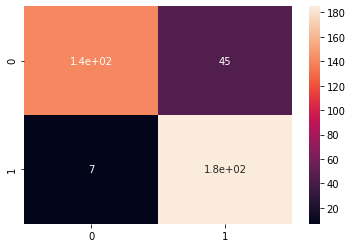

In [305]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test["Label"],predictions_random)
sns.heatmap(cm,annot=True)

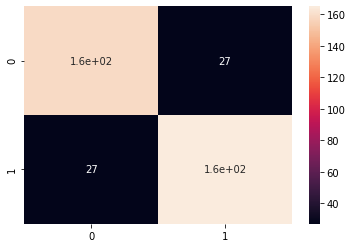

In [306]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test["Label"],predictions_logistic)
sns.heatmap(cm,annot=True)